In [57]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import time
import diffusionstuff6 as ds
from copy import copy as dup
from scipy.integrate import odeint

# Graphics parameters
%matplotlib notebook
ticklabelsize = 15
fontsize = 20
linewidth = 2
fignum = 0

In [58]:
#lastfile = 'NeshData/continuum_model6 20-5-2016[2][2].traj.npz'
#lastfile = 'NeshData/continuum_model6 18-5-2016[1][7].traj.npz'
#lastfile = 'NeshData/continuum_model6 20-5-2016[3][6].traj.npz'
lastfile = 'NeshData/continuum_model6 20-5-2016[4][4].traj.npz'
#lastfile = 'NeshData/continuum_model6 20-5-2016[3][8].traj.npz'
#lastfile = 'NeshData/continuum_model6 18-5-2016[1][8].traj.npz'
#lastfile = 'NeshData/continuum_model6 20-5-2016[2][3].traj.npz'
#lastfile = 'NeshData/continuum_model6 20-5-2016[2][6].traj.npz'

print "loading", lastfile
npzfile = np.load(lastfile)
Fliq = npzfile['Fliq']
Nice = npzfile['Nice']
Nbar = npzfile['Nbar']
Nstar = npzfile['Nstar']
t = npzfile['t']
x = npzfile['x']

sigma0 = npzfile['sigma0']
c_r = npzfile['c_r']
D = npzfile['D']
L = npzfile['L']
nu_kin = npzfile['nu_kin']
nu_kin_ml = npzfile['nu_kin_ml']
sigmastepmax = npzfile['sigmastepmax']
sigmastepstyle = npzfile['sigmastepstyle']
xmax = max(x)
xmid = max(x)/2
nx = len(x)
ntimes = len(t)
ncenter = int(nx/2)
center_reduction = c_r*100
Ntot = Nice + Fliq

sigmastep = ds.getsigmastep(x,xmax,center_reduction,sigmastepmax,method=sigmastepstyle)

print c_r, D, L, nu_kin, nu_kin_ml, sigmastepmax, sigmastepstyle
print ntimes


loading NeshData/continuum_model6 20-5-2016[4][4].traj.npz
0.0025 0.0002 25.0 49 0.163333333333 0.4 sinusoid
1055


In [66]:
ncorner = 40

if lastfile == 'NeshData/continuum_model6 20-5-2016[2][2].traj.npz':
    irange_RFC = [i for i in range(0,0+75*4)]; print max(irange_RFC)-min(irange_RFC)
    irange_FC = [i for i in range(14,14+75*4)]; print max(irange_FC)-min(irange_FC)
    
elif lastfile == 'NeshData/continuum_model6 18-5-2016[1][7].traj.npz':
    irange_RFC = [i for i in range(0,0+344)]; print max(irange_RFC)-min(irange_RFC)
    irange_FC = [i for i in range(191,191+344)]; print max(irange_FC)-min(irange_FC)

elif lastfile == 'NeshData/continuum_model6 20-5-2016[3][6].traj.npz':
    irange_RFC = [i for i in range(0,0+162*4)]; print max(irange_RFC)-min(irange_RFC)
    irange_FC = [i for i in range(134,134+162*4)]; print max(irange_FC)-min(irange_FC)

elif lastfile == 'NeshData/continuum_model6 20-5-2016[4][4].traj.npz':
    irange_RFC = [i for i in range(0,0+118*4)]; print max(irange_RFC)-min(irange_RFC)
    irange_FC = [i for i in range(86,86+118*4)]; print max(irange_FC)-min(irange_FC)
# elif lastfile == 'NeshData/continuum_model6 20-5-2016[4][4].traj.npz':
#     irange_RFC = [i for i in range(0,0+118*4)]; print max(irange_RFC)-min(irange_RFC)
#     irange_FC = [i for i in range(86+74,74+86+118*4)]; print max(irange_FC)-min(irange_FC)

elif lastfile == 'NeshData/continuum_model6 20-5-2016[3][8].traj.npz':
    irange_RFC = [i for i in range(0,0+162*4)]; print max(irange_RFC)-min(irange_RFC)
    irange_FC = [i for i in range(137,137+162*4)]; print max(irange_FC)-min(irange_FC)

elif lastfile == 'NeshData/continuum_model6 18-5-2016[1][8].traj.npz':
    irange_RFC = [i for i in range(0,34*9)]; print max(irange_RFC)-min(irange_RFC)
    irange_FC = [i for i in range(19,19+34*9)]; print max(irange_FC)-min(irange_FC)

elif lastfile == 'NeshData/continuum_model6 20-5-2016[2][3].traj.npz':
    irange_RFC = [i for i in range(0,0+75*9)]; print max(irange_RFC)-min(irange_RFC)
    irange_FC = [i for i in range(14,14+75*9)]; print max(irange_FC)-min(irange_FC)
    
elif lastfile == 'NeshData/continuum_model6 20-5-2016[2][6].traj.npz':
    irange_RFC = [i for i in range(0,0+75*9)]; print max(irange_RFC)-min(irange_RFC)
    irange_FC = [i for i in range(67,67+75*9)]; print max(irange_FC)-min(irange_FC)
    
else:
    print 'bad choice'
    
fignum = 0
print ncorner
print ncenter

471
471
40
250


<IPython.core.display.Javascript object>


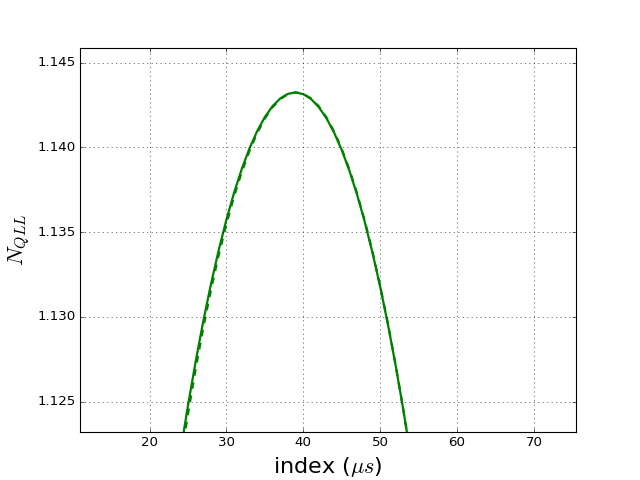

In [67]:
Iwantfigs = True

# Graph them
if Iwantfigs:
    Fliq_RFC = np.array(Fliq)[irange_RFC,ncorner]
    Fliq_FC = np.array(Fliq)[irange_FC,ncenter]
    fignum += 1
    plt.figure(fignum)
    plt.plot(Fliq_RFC, 'g-', lw=linewidth)
    plt.plot(Fliq_FC,  'g--', lw=linewidth)
    plt.plot(irange_RFC,Fliq_RFC[0]*np.ones(np.shape(Fliq_RFC)))
    plt.xlabel(r'index ($\mu s$)',fontsize=fontsize)
    plt.ylabel(r'$N_{QLL}$',fontsize=fontsize)
    #plt.legend(['corner (RFC)','interior (FC)'],loc='upper right')
    plt.grid('on')

weird, center 0.900413877161
sigma_d, corner 0.260201763543
sigma_d, center 0.260101319389
alpha, corner 0.650592229345
alpha, center 0.651886705807


<IPython.core.display.Javascript object>


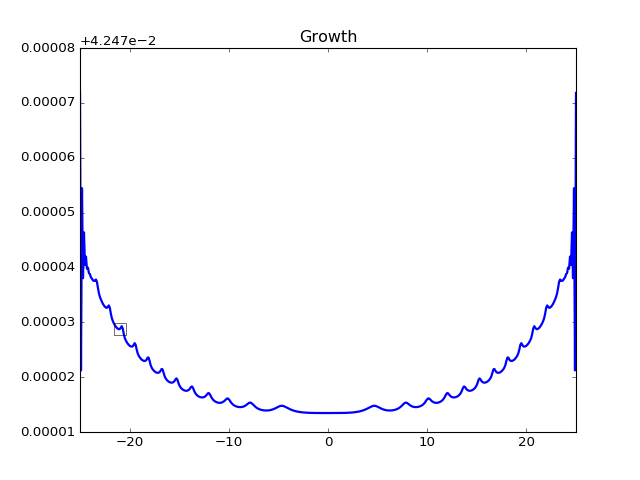

<IPython.core.display.Javascript object>


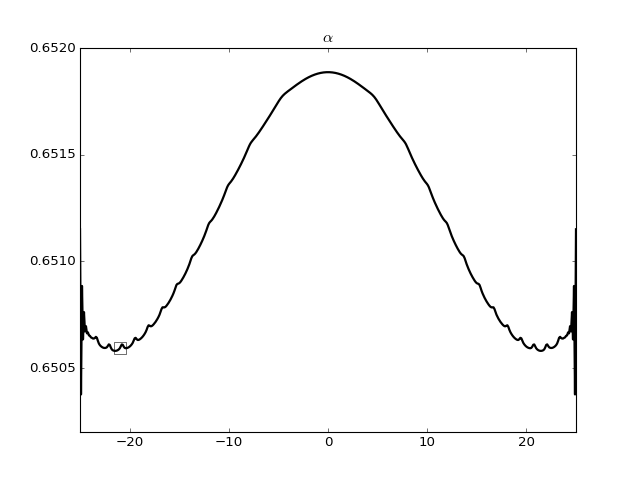

<IPython.core.display.Javascript object>


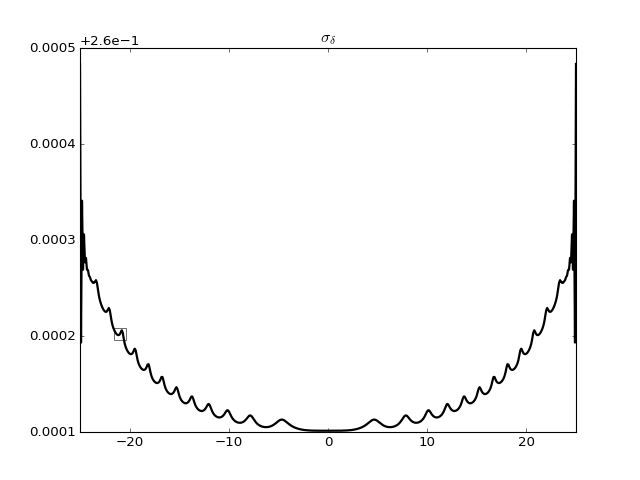

growth rate at center: 0.0424834576725 ml/us
difference in growthrates: 0.0360092087258 %
difference in alpha: 0.198968940058 %
sigma_d difference -0.0386024110174 %
explained 102.003282691 %


In [61]:
ntau = len(irange_RFC)
tau = t[irange_RFC]
delta_tau = tau[-1]-tau[0]
irange = np.array(irange_RFC)
Delta_Ntot_accum = []
sigd_RFC_accum = []
sigd_corner_accum = []
sigd_center_accum = []
weird_accum = []
for i in range(0,ntau):
    Ntot_RFC_tau = Ntot[irange,:]
    Fliq_RFC_tau = Fliq[irange,:]
    
    Delta_Ntot = Ntot_RFC_tau[-1,:]-Ntot_RFC_tau[0,:]
    Delta_Ntot_accum.append(Delta_Ntot)
    
    delta_RFC = (Fliq_RFC_tau - (Nbar - Nstar))/(2*Nstar)
    sigd_RFC = (sigmastep - delta_RFC*sigma0)/(1+delta_RFC*sigma0)
    weird = 1./(1+delta_RFC*sigma0)
    sigd_RFC_mean = np.mean(sigd_RFC,axis=0)
    sigd_RFC_accum.append(sigd_RFC_mean)
    weird_accum.append(weird[ncenter])
    sigd_corner_accum.append(sigd_RFC_mean[ncorner])
    sigd_center_accum.append(sigd_RFC_mean[ncenter])
    irange += 1

Delta_Ntot_mean = np.mean(Delta_Ntot_accum,axis=0)
Growth_Ntot_mean = Delta_Ntot_mean/delta_tau
alpha_mean = Delta_Ntot_mean/nu_kin_ml/sigmastep/delta_tau
sigd_RFC_mean = np.mean(sigd_RFC_accum,axis=0)
weird_mean = np.mean(weird_accum); print 'weird, center', weird_mean
sigd_corner_mean = np.mean(sigd_corner_accum); print 'sigma_d, corner', sigd_corner_mean
sigd_center_mean = np.mean(sigd_center_accum); print 'sigma_d, center', sigd_center_mean
print 'alpha, corner', alpha_mean[ncorner]
print 'alpha, center', alpha_mean[ncenter]

fignum += 1
plt.figure(fignum)
plt.plot(x-xmid,Growth_Ntot_mean, 'b', lw=linewidth)
plt.plot(x[ncorner]-xmid,Growth_Ntot_mean[ncorner], 'bs', lw=linewidth, markersize=10, markerfacecolor='none')
plt.title('Growth')
plt.xlim([-L,L])

fignum += 1
plt.figure(fignum)
plt.plot(x-xmid,alpha_mean, 'k', lw=linewidth)
plt.plot(x[ncorner]-xmid,alpha_mean[ncorner], 'ks', lw=linewidth, markersize=10, markerfacecolor='none')
plt.title(r'$\alpha$')
plt.xlim([-L,L])

fignum += 1
plt.figure(fignum)
plt.plot(x-xmid,sigd_RFC_mean, 'k', lw=linewidth)
plt.plot(x[ncorner]-xmid,sigd_RFC_mean[ncorner], 'ks', lw=linewidth, markersize=10, markerfacecolor='none')
plt.title(r'$\sigma_\delta$')
plt.xlim([-L,L])

Delta_alpha_mean = alpha_mean[ncenter]-alpha_mean[ncorner]
Delta_Delta_Ntot_mean = (Delta_Ntot_mean[ncorner]-Delta_Ntot_mean[ncenter])/Delta_Ntot_mean[ncorner]
Delta_sigd_mean = (sigd_center_mean-sigd_corner_mean)/sigd_corner_mean

print 'growth rate at center:', Delta_Ntot_mean[ncenter]/delta_tau, 'ml/us'
print 'difference in growthrates:', Delta_Delta_Ntot_mean*100, '%'
print 'difference in alpha:', Delta_alpha_mean/alpha_mean[ncorner]*100, '%'
print 'sigma_d difference', Delta_sigd_mean*100, '%'
print 'explained', (Delta_alpha_mean-Delta_sigd_mean-Delta_Delta_Ntot_mean)/Delta_alpha_mean*100, '%'
